In [1]:
# Structural Design supported by Machine Learning
# Original code developed by Vahid Moosavi (sevamoo@gmail.com) and adapted by Pierluigi D'Acunto (pierluigi.dacunto@tum.de)

#If you use the scripts please reference the official GitHub repository:
#@Misc{sdml2021,
#author = {D'Acunto, Pierluigi and Ohbrock, Patrick Ole and Saldana Ochoa, Karla and Moosavi, Vahid},
#title = {{SDML: Structural Design supported by Machine Learning}},
#year = {2021},
#url = {https://github.com/pierluigidacunto/SDML},
#}

# Machine Learning-Assisted Computational Structural Design

## 0 Environment

In [6]:
!pip install numpy
!pip install pandas
!pip install scipy
!pip install matplotlib
!pip install numexpr

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [1]:
# Import libraries

import pandas as pd
import numpy as np
import sompylib.sompy as SOM
import math
import pathlib
import os
import matplotlib.pyplot as plt

## 1 Reading CEM data

In [2]:
data_file = "CEM/Data/240806_data_00_CEM.csv"
graph_file = "CEM/Data/240806_data_00_branch-node_CEM.csv"

In [3]:
# Read CSV file and create DataFrame
root_path = pathlib.Path().absolute()

data = pd.read_csv(
    os.path.join(
        root_path,
        data_file),
    header=None)

data = data.dropna()
data.head(10)  # show first 10 entries of DataFrame

0         1         2         3         4          5         6    \
0  11.053293 -2.215451  0.962143 -0.124993  0.174456 -24.502925 -3.497571   
1  19.809351 -2.725744  0.965676 -0.078056 -0.089388 -29.080566 -4.450883   
2  19.307250 -1.918171  0.957000  0.031025  0.047402 -26.259059 -3.104962   
3  14.529860 -1.923345  0.954132 -0.133561  0.017593 -29.388453 -3.542591   
4  11.853671 -1.545379  0.978534 -0.111592  0.093475 -20.721077 -3.719690   
5  19.968321 -1.785888  0.978358 -0.086165  0.199824 -25.319267 -2.703256   
6  19.667466 -2.722765  0.961461 -0.148563 -0.027422 -24.084745 -2.761177   
7  17.987678 -2.315721  0.962039 -0.125283 -0.066783 -28.314817 -1.912317   
8  18.828903 -2.594578  0.962092 -0.195518  0.182689 -27.119617 -1.285677   
9  17.620845 -1.584158  0.972464  0.069000  0.157371 -22.355564 -3.113362   

        7         8          9    ...        498        499       500  \
0  2.010365  1.263953   3.015713  ...  11.053293  11.053293 -2.215451   
1  4.175257  0.426267   5.073588  ...  19.809351  19.809351 -2.725744   
2  4.476623  0.857323  13.428574  ...  19.307250  19.307250 -1.918171   
3  4.437829  1.834450  19.590452  ...  14.529860  14.529860 -1.923345   
4  3.244114  0.201728   1.229421  ...  11.853671  11.853671 -1.545379   
5  2.042605  1.734630  18.555559  ...  19.968321  19.968321 -1.785888   
6  3.380235  0.950369   8.623888  ...  19.667466  19.667466 -2.722765   
7  5.415488  1.890311  10.000616  ...  17.987678  17.987678 -2.315721   
8  5.791214  0.173382  11.830853  ...  18.828903  18.828903 -2.594578   
9  2.947440  1.513028   2.492078  ...  17.620845  17.620845 -1.584158   

        501       502       503       504       505           506        507  
0 -2.215451 -0.124993 -0.124993 -0.124993 -0.124993   7883.851499   7.762655  
1 -2.725744 -0.078056 -0.078056 -0.078056 -0.078056  10637.768958   5.957113  
2 -1.918171  0.031025  0.031025  0.031025  0.031025  14185.873830   9.102210  
3 -1.923345 -0.133561 -0.133561 -0.133561 -0.133561  15220.635289  11.706990  
4 -1.545379 -0.111592 -0.111592 -0.111592 -0.111592   7123.083010  10.704962  
5 -1.785888 -0.086165 -0.086165 -0.086165 -0.086165  18918.924350   5.497823  
6 -2.722765 -0.148563 -0.148563 -0.148563 -0.148563  11825.011953   7.777674  
7 -2.315721 -0.125283 -0.125283 -0.125283 -0.125283  12414.898344   8.576663  
8 -2.594578 -0.195518 -0.195518 -0.195518 -0.195518  13251.745732  10.370622  
9 -1.584158  0.069000  0.069000  0.069000  0.069000   8663.473403   8.026496  

[10 rows x 508 columns]

In [4]:
# Import branch-node matrix
graph_edges = pd.read_csv(
    os.path.join(
        root_path,
        graph_file),
    header=None)

graph_edges.head(10)

0    1    2    3    4    5    6    7    8    9    ...  250  251  252  253  \
0    0    6    1    7    2   10    3   11    4   12  ...    8    9    5    8   

   254  255  256  257  258  259  
0    4    9   53   58   45   48  

[1 rows x 260 columns]

## 1.1 Data description

### Data CSV

| DESCRIPTION | VARIABLE NAME | DIMENSION | SOURCE |
| --- | --- | --- | --- |
| deviation force at main cable midspan | cable_center_deviation_force | 1 | input |
| deviation force at deck midspan | deck_center_deviation_force | 1 | input |
| force in hangars | hangar_force | 1 | input |
| force in deviations inside deck | deck_deviation_force | 1 | input |
| force in deviations between main cables | cable_deviation_force | 1 | input |
| force in support towers | tower_force | 1 | input |
| force in brace between support towers | tower_brace_force | 1 | input |
| rise of the deck | deck_rise | 1 | input
| vertical distance between the deck and main cables at midspan | cable_deck_midspan_distance | 1 | input |
| offset of tower base location in x direction/perpendicular to the river | tower_base_x_offset | 1 | input |
| offset of tower base location in y direction/parallel | tower_base_y_offset | 1 | input |
| offset of origin nodes at midspan to create a twist in the bridge | twist_offset | 1 | input |
| number of nodes | nN | 1 | output |
| number of trail edges | nT | 1 | output |
| number of deviation edges | nD | 1 | output |
| load X | loadX | 1 | input |
| load Y | loadY | 1 | input |
| load Z | loadZ | 1 | input |
| nodes position X | posX | nN | output |
| nodes position Y | posX | nN | output |
| nodes position Z | posX | nN | output |
| trail lenghts | traLen | nT | output |
| trail magnitudes | traMag | nT | output |
| deviation lenghts | devLen | nD | output |
| deviation magnitudes | devMag | nD | input |
| total load path | load_path | 1 | output |
| highest inclination of the deck in degrees | maximum deck inclination | 1 | output |

### Graph CSV
| DESCRPTION | VARIABLE | DIMENSION | INDEX | SOURCE |
| --- | --- | --- | --- | --- |
| edge start | start | nT + nD | even (0, 2, 4, ..., (nT + nD) * 2) | input |
| edge end | end | nT + nD | odd (1, 3, 5, ..., (nT + nD) * 2 + 1) | input |

Read graph info.

In [5]:
nN = int(data.iloc[0][12])
nT = int(data.iloc[0][13])
nD = int(data.iloc[0][14])

print('Number of Nodes = {0}\nNumber of Trail Edges = {1}\nNumber of Deviation Edges = {2}'.format(nN, nT, nD))

Number of Nodes = 76
Number of Trail Edges = 64
Number of Deviation Edges = 66


Generate labels for columns in DataFrame

In [6]:
label_columns_fix_head = [
    "cable_center_deviation_force",
    "deck_center_deviation_force",
    "hangar_force",
    "deck_deviation_force",
    "cable_deviation_force",
    "tower_force",
    "tower_brace_force",
    "deck_rise",
    "cable_deck_midspan_distance",
    "tower_base_x_offset",
    "tower_base_y_offset",
    "twist_offset",
    "nN",
    "nT",
    "nD",
    "loadX",
    "loadY",
    "loadZ"
]

label_columns_fix_tail = [
    "load_path",
    "maximum_deck_inclination"
]

nX = len(label_columns_fix_head)    # number of fixed entries

label_columns = label_columns_fix_head[:]
label_columns += ["posX_" + str(i) for i in range(nN)]
label_columns += ["posY_" + str(i) for i in range(nN)]
label_columns += ["posZ_" + str(i) for i in range(nN)]    
label_columns += ["traLen_" + str(i) for i in range(nT)]
label_columns += ["traMag_" + str(i) for i in range(nT)]
label_columns += ["devLen_" + str(i) for i in range(nD)]
label_columns += ["devMag_" + str(i) for i in range(nD)]
label_columns += label_columns_fix_tail

data.columns = label_columns
data.head(10)

cable_center_deviation_force  deck_center_deviation_force  hangar_force  \
0                     11.053293                    -2.215451      0.962143   
1                     19.809351                    -2.725744      0.965676   
2                     19.307250                    -1.918171      0.957000   
3                     14.529860                    -1.923345      0.954132   
4                     11.853671                    -1.545379      0.978534   
5                     19.968321                    -1.785888      0.978358   
6                     19.667466                    -2.722765      0.961461   
7                     17.987678                    -2.315721      0.962039   
8                     18.828903                    -2.594578      0.962092   
9                     17.620845                    -1.584158      0.972464   

   deck_deviation_force  cable_deviation_force  tower_force  \
0             -0.124993               0.174456   -24.502925   
1             -0.078056              -0.089388   -29.080566   
2              0.031025               0.047402   -26.259059   
3             -0.133561               0.017593   -29.388453   
4             -0.111592               0.093475   -20.721077   
5             -0.086165               0.199824   -25.319267   
6             -0.148563              -0.027422   -24.084745   
7             -0.125283              -0.066783   -28.314817   
8             -0.195518               0.182689   -27.119617   
9              0.069000               0.157371   -22.355564   

   tower_brace_force  deck_rise  cable_deck_midspan_distance  \
0          -3.497571   2.010365                     1.263953   
1          -4.450883   4.175257                     0.426267   
2          -3.104962   4.476623                     0.857323   
3          -3.542591   4.437829                     1.834450   
4          -3.719690   3.244114                     0.201728   
5          -2.703256   2.042605                     1.734630   
6          -2.761177   3.380235                     0.950369   
7          -1.912317   5.415488                     1.890311   
8          -1.285677   5.791214                     0.173382   
9          -3.113362   2.947440                     1.513028   

   tower_base_x_offset  ...  devMag_58  devMag_59  devMag_60  devMag_61  \
0             3.015713  ...  11.053293  11.053293  -2.215451  -2.215451   
1             5.073588  ...  19.809351  19.809351  -2.725744  -2.725744   
2            13.428574  ...  19.307250  19.307250  -1.918171  -1.918171   
3            19.590452  ...  14.529860  14.529860  -1.923345  -1.923345   
4             1.229421  ...  11.853671  11.853671  -1.545379  -1.545379   
5            18.555559  ...  19.968321  19.968321  -1.785888  -1.785888   
6             8.623888  ...  19.667466  19.667466  -2.722765  -2.722765   
7            10.000616  ...  17.987678  17.987678  -2.315721  -2.315721   
8            11.830853  ...  18.828903  18.828903  -2.594578  -2.594578   
9             2.492078  ...  17.620845  17.620845  -1.584158  -1.584158   

   devMag_62  devMag_63  devMag_64  devMag_65     load_path  \
0  -0.124993  -0.124993  -0.124993  -0.124993   7883.851499   
1  -0.078056  -0.078056  -0.078056  -0.078056  10637.768958   
2   0.031025   0.031025   0.031025   0.031025  14185.873830   
3  -0.133561  -0.133561  -0.133561  -0.133561  15220.635289   
4  -0.111592  -0.111592  -0.111592  -0.111592   7123.083010   
5  -0.086165  -0.086165  -0.086165  -0.086165  18918.924350   
6  -0.148563  -0.148563  -0.148563  -0.148563  11825.011953   
7  -0.125283  -0.125283  -0.125283  -0.125283  12414.898344   
8  -0.195518  -0.195518  -0.195518  -0.195518  13251.745732   
9   0.069000   0.069000   0.069000   0.069000   8663.473403   

   maximum_deck_inclination  
0                  7.762655  
1                  5.957113  
2                  9.102210  
3                 11.706990  
4                 10.704962  
5                  5.497823  
6              

## 1.2 Graph Visualiztion

In [7]:
nE = nT + nD

edges = [(int(graph_edges.iloc[0][i * 2]), int(graph_edges.iloc[0][i * 2 + 1])) for i in range(nE)]

In [73]:
from mpl_toolkits.mplot3d import Axes3D

def show_sample(data_frame, sample_index, view='3D-30', ax = None):
    # array of node xyz coordinates
    p0 = nX
    p1 = p0 + 3*nN
    pos_xyz = data_frame.iloc[sample_index][p0:p1]
    
    pos_x = pos_xyz[: nN]
    pos_y = pos_xyz[nN : 2*nN]
    pos_z = pos_xyz[2*nN:]
    coords = np.array([pos_x, pos_y, pos_z]).T  
    
    # array of trail edges    
    p0 = p1
    p1 = p0 + nT
    trail_len = data_frame.iloc[sample_index][p0:p1]
    
    p0 = p1
    p1 = p0 + nT
    trail_mag = data_frame.iloc[sample_index][p0:p1]
    
    # array of deviation edges    
    p0 = p1
    p1 = p0 + nD
    dev_len = data_frame.iloc[sample_index][p0:p1]
    
    p0 = p1
    p1 = p0 + nD
    dev_mag = data_frame.iloc[sample_index][p0:p1]

    edges_mag = np.concatenate((trail_mag, dev_mag), axis = None)
    
    if ax is None:
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(111, projection='3d')

    ax.set_title(str(data_frame.index[sample_index]), size=25)
    ax.set_aspect('auto')
    ax.axis('off')
    
    # Set view
    ax.set_proj_type('ortho')
    
    if view == '2D-XY':
        ax.view_init(elev=90, azim=-90) # 2D-XY
    elif view == '2D-XZ':
        ax.view_init(elev=0, azim=90) # 2D-XZ
    elif view == '2D-YZ':
        ax.view_init(elev=0, azim=0) # 2D-YZ
    elif view == '3D-45':
        ax.view_init(elev=45, azim=45) # 3D-45
    else:
        ax.view_init(elev=30, azim=60) # 3D-30
    
    for edge, mag in zip(edges, edges_mag):
        line_color = (5/256,120/256,190/256) if np.sign(mag) < 0 else (200/256,20/256,20/256)
        line_width = 0.3 + np.abs(mag/40)
             
        ax.plot(coords[edge,0], 
                coords[edge,1],
                coords[edge,2], 
                color = line_color, 
                linewidth = line_width, 
                antialiased=True, 
                alpha = 1.0)

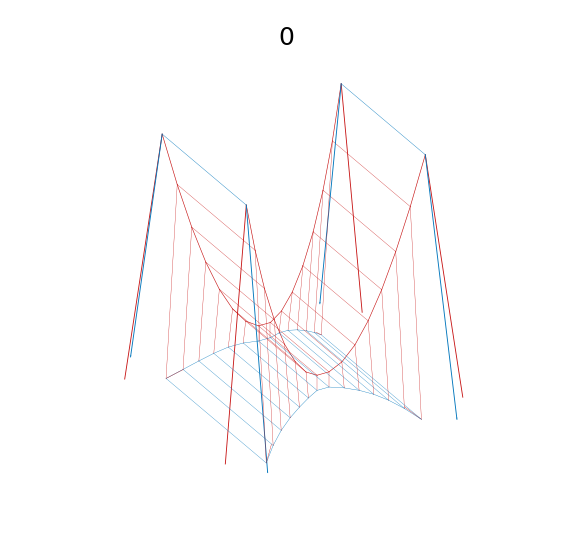

In [74]:
show_sample(data, 0, '3D-30')
plt.show()

## 2. Compute Feature Vectors

We pre-calculate high-order statistics (Min, Max, Mean, Standard Deviation, Skewness, Kurtosis) per type (Floor Height, Node, Trail, Deviation)

In [33]:
from numpy import mean
from numpy import std
from scipy.stats import skew
from scipy.stats import kurtosis

# Convert initial DataFrame to Numpy 2D array
src_data = data.values[:]

# Initialize list of list where initial variable features are replaced by their corresponding statistics
data_arr2d = []

# Iterate through each row of the array (i.e. each row of the DataFrame)
for i in range(len(src_data)): 
    src_row = src_data[i]
    # Calculate statistics per feature    
    p0 = nX
    p1 = p0 + nN
    posX_arr = src_row[p0:p1]
    posX_min = posX_arr.min()
    posX_max = posX_arr.max()
    posX_mean = mean(posX_arr)
    posX_std = std(posX_arr)
    posX_skew = skew(posX_arr)
    posX_kurt = kurtosis(posX_arr)

    p0 = p1
    p1 = p0 + nN
    posY_arr = src_row[p0:p1]
    posY_min = posY_arr.min()
    posY_max = posY_arr.max()
    posY_mean = mean(posY_arr)
    posY_std = std(posY_arr)
    posY_skew = skew(posY_arr)
    posY_kurt = kurtosis(posY_arr)    

    p0 = p1
    p1 = p0 + nN
    posZ_arr = src_row[p0:p1]
    posZ_min = posZ_arr.min()
    posZ_max = posZ_arr.max()
    posZ_mean = mean(posZ_arr)
    posZ_std = std(posZ_arr)
    posZ_skew = skew(posZ_arr)
    posZ_kurt = kurtosis(posZ_arr)

    p0 = p1
    p1 = p0 + nT
    traLen_arr = src_row[p0:p1]
    traLen_min = traLen_arr.min()
    traLen_max = traLen_arr.max()
    traLen_mean = mean(traLen_arr)
    traLen_std = std(traLen_arr)
    traLen_skew = skew(traLen_arr)
    traLen_kurt = kurtosis(traLen_arr) 
           
    p0 = p1
    p1 = p0 + nT
    traMag_arr = src_row[p0:p1]
    traMag_min = traMag_arr.min()
    traMag_max = traMag_arr.max()
    traMag_mean = mean(traMag_arr)
    traMag_std = std(traMag_arr)
    traMag_skew = skew(traMag_arr)
    traMag_kurt = kurtosis(traMag_arr)
    
    p0 = p1
    p1 = p0 + nD
    devLen_arr = src_row[p0:p1]
    devLen_min = devLen_arr.min()
    devLen_max = devLen_arr.max()
    devLen_mean = mean(devLen_arr)
    devLen_std = std(devLen_arr)
    devLen_skew = skew(devLen_arr)
    devLen_kurt = kurtosis(devLen_arr) 
           
    p0 = p1
    p1 = p0 + nD
    devMag_arr = src_row[p0:p1]
    devMag_min = devMag_arr.min()
    devMag_max = devMag_arr.max()
    devMag_mean = mean(devMag_arr)
    devMag_std = std(devMag_arr)
    devMag_skew = skew(devMag_arr)
    devMag_kurt = kurtosis(devMag_arr)

    # Assemble flattened features in an array
    data_arr = [
                posX_min, posX_max, posX_mean, posX_std, posX_skew, posX_kurt,
                posY_min, posY_max, posY_mean, posY_std, posY_skew, posY_kurt,
                posZ_min, posZ_max, posZ_mean, posZ_std, posZ_skew, posZ_kurt,
                traLen_min, traLen_max, traLen_mean, traLen_std, traLen_skew, traLen_kurt,
                traMag_min, traMag_max, traMag_mean, traMag_std, traMag_skew, traMag_kurt,
                devLen_min, devLen_max, devLen_mean, devLen_std, devLen_skew, devLen_kurt,
                devMag_min, devMag_max, devMag_mean, devMag_std, devMag_skew, devMag_kurt,
                ]
    
    data_arr2d.append(data_arr)

In [34]:
# Convert list of list into DataFrame
data_hos = pd.DataFrame.from_records(data_arr2d)
data_hos.index = data.index

label_columns = [
                "posX_min", "posX_max", "posX_mean", "posX_std", "posX_skew", "posX_kurt",
                "posY_min", "posY_max", "posY_mean", "posY_std", "posY_skew", "posY_kurt",
                "posZ_min", "posZ_max", "posZ_mean", "posZ_std", "posZ_skew", "posZ_kurt",
                "traLen_min", "traLen_max", "traLen_mean", "traLen_std", "traLen_skew", "traLen_kurt",
                "traMag_min", "traMag_max", "traMag_mean", "traMag_std", "traMag_skew", "traMag_kurt",
                "devLen_min", "devLen_max", "devLen_mean", "devLen_std", "devLen_skew", "devLen_kurt",
                "devMag_min", "devMag_max", "devMag_mean", "devMag_std", "devMag_skew", "devMag_kurt",
                ]

data_hos.columns = label_columns
data_hos.head(10)

posX_min   posX_max  posX_mean   posX_std     posX_skew  posX_kurt  \
0 -152.781586 -12.797782 -82.789684  37.486763 -4.477993e-15  -1.143393   
1 -156.691996  -8.887373 -82.789684  39.873032 -1.603848e-14  -1.079455   
2 -178.769347  13.189978 -82.789684  42.783270 -2.435252e-15  -0.567495   
3 -184.779475  19.200106 -82.789684  44.139076  6.118622e-15  -0.345175   
4 -153.729600 -11.849769 -82.789684  37.215455 -2.050575e-15  -1.127400   
5 -204.258173  38.678804 -82.789684  46.472393  1.513227e-14   0.359933   
6 -169.957154   4.377785 -82.789684  40.726703  2.159851e-15  -0.789407   
7 -167.468135   1.888766 -82.789684  41.515937 -8.134589e-16  -0.878337   
8 -172.762510   7.183141 -82.789684  41.781923  6.342175e-15  -0.728504   
9 -156.844507  -8.734862 -82.789684  38.132605  1.063574e-15  -1.092336   

   posY_min   posY_max  posY_mean  posY_std  ...  devLen_mean  devLen_std  \
0 -3.520100  12.956940    4.71842  5.108702  ...     8.747391    4.802909   
1 -1.321112  10.757952    4.71842  3.544084  ...     5.881097    3.481597   
2  0.377497   9.059343    4.71842  3.634620  ...     7.131418    4.264002   
3  0.379430   9.057409    4.71842  3.576538  ...     8.342603    5.838613   
4 -1.441850  10.878690    4.71842  3.855414  ...     7.904387    4.875428   
5 -0.318761   9.755601    4.71842  4.028987  ...     7.786783    4.608195   
6 -2.244993  11.681833    4.71842  4.002498  ...     6.491313    3.706917   
7 -0.050688   9.487528    4.71842  3.470629  ...     7.224304    4.329319   
8 -3.266071  12.702911    4.71842  4.864333  ...     7.213077    4.482582   
9 -1.447400  10.884240    4.71842  4.349416  ...     7.653335    3.590988   

   devLen_skew  devLen_kurt  devMag_min  devMag_max  devMag_mean  devMag_std  \
0     0.786760     0.564182  -24.502925   11.053293    -0.904525    6.339836   
1     0.836486     1.410976  -29.080566   19.809351    -1.005487    7.959747   
2     1.338470     2.908713  -26.259059   19.307250    -0.735970    7.303250   
3     2.030063     4.153172  -29.388453   14.529860    -1.126270    7.639095   
4     0.722635     0.264761  -20.721077   11.853671    -0.644876    5.546744   
5     1.808795     4.341270  -25.319267   19.968321    -0.626265    7.160816   
6     1.030268     1.678067  -24.084745   19.667466    -0.659316    6.877176   
7     1.618147     2.923693  -28.314817   17.987678    -0.931694    7.628667   
8     0.934632     1.680589  -27.119617   18.828903    -0.785185    7.440623   
9     0.210522    -0.256850  -22.355564   17.620845    -0.502688    6.342131   

   devMag_skew  devMag_kurt  
0    -2.912313     9.021970  
1    -2.113161     7.799841  
2    -1.955814     7.761026  
3    -2.799457     8.892024  
4    -2.521002     8.188650  
5    -1.759943     7.644201  
6    -1.608656     7.473334  
7    -2.333937     8.209350  
8    -2.126243     7.974600  
9    -1.768726     7.565931  

[10 rows x 42 columns]

In [41]:
# merge the HOS data with other fixed-length data in the source data frame

data_hos = pd.concat(
    [
        data[label_columns_fix_head], 
        data_hos, 
        data[label_columns_fix_tail]
    ],
    axis=1)

data_hos.head(10)

cable_center_deviation_force  deck_center_deviation_force  hangar_force  \
0                     11.053293                    -2.215451      0.962143   
1                     19.809351                    -2.725744      0.965676   
2                     19.307250                    -1.918171      0.957000   
3                     14.529860                    -1.923345      0.954132   
4                     11.853671                    -1.545379      0.978534   
5                     19.968321                    -1.785888      0.978358   
6                     19.667466                    -2.722765      0.961461   
7                     17.987678                    -2.315721      0.962039   
8                     18.828903                    -2.594578      0.962092   
9                     17.620845                    -1.584158      0.972464   

   deck_deviation_force  cable_deviation_force  tower_force  \
0             -0.124993               0.174456   -24.502925   
1             -0.078056              -0.089388   -29.080566   
2              0.031025               0.047402   -26.259059   
3             -0.133561               0.017593   -29.388453   
4             -0.111592               0.093475   -20.721077   
5             -0.086165               0.199824   -25.319267   
6             -0.148563              -0.027422   -24.084745   
7             -0.125283              -0.066783   -28.314817   
8             -0.195518               0.182689   -27.119617   
9              0.069000               0.157371   -22.355564   

   tower_brace_force  deck_rise  cable_deck_midspan_distance  \
0          -3.497571   2.010365                     1.263953   
1          -4.450883   4.175257                     0.426267   
2          -3.104962   4.476623                     0.857323   
3          -3.542591   4.437829                     1.834450   
4          -3.719690   3.244114                     0.201728   
5          -2.703256   2.042605                     1.734630   
6          -2.761177   3.380235                     0.950369   
7          -1.912317   5.415488                     1.890311   
8          -1.285677   5.791214                     0.173382   
9          -3.113362   2.947440                     1.513028   

   tower_base_x_offset  ...  devLen_skew  devLen_kurt  devMag_min  devMag_max  \
0             3.015713  ...     0.786760     0.564182  -24.502925   11.053293   
1             5.073588  ...     0.836486     1.410976  -29.080566   19.809351   
2            13.428574  ...     1.338470     2.908713  -26.259059   19.307250   
3            19.590452  ...     2.030063     4.153172  -29.388453   14.529860   
4             1.229421  ...     0.722635     0.264761  -20.721077   11.853671   
5            18.555559  ...     1.808795     4.341270  -25.319267   19.968321   
6             8.623888  ...     1.030268     1.678067  -24.084745   19.667466   
7            10.000616  ...     1.618147     2.923693  -28.314817   17.987678   
8            11.830853  ...     0.934632     1.680589  -27.119617   18.828903   
9             2.492078  ...     0.210522    -0.256850  -22.355564   17.620845   

   devMag_mean  devMag_std  devMag_skew  devMag_kurt     load_path  \
0    -0.904525    6.339836    -2.912313     9.021970   7883.851499   
1    -1.005487    7.959747    -2.113161     7.799841  10637.768958   
2    -0.735970    7.303250    -1.955814     7.761026  14185.873830   
3    -1.126270    7.639095    -2.799457     8.892024  15220.635289   
4    -0.644876    5.546744    -2.521002     8.188650   7123.083010   
5    -0.626265    7.160816    -1.759943     7.644201  18918.924350   
6    -0.659316    6.877176    -1.608656     7.473334  11825.011953   
7    -0.931694    7.628667    -2.333937     8.209350  12414.898344   
8    -0.785185    7.440623    -2.126243     7.974600  13251.745732   
9    -0.502688    6.342131    -1.768726     7.565931   8663.473403   

   maximum_deck_inclination  
0                  7.762655  
1                  5.9

## 2.1 Filter Data

In [42]:
# Filter DataFrame 1

traMag_max_mask = abs(data_hos['traLen_max']) < abs(data_hos['traLen_max']).quantile(0.9)
data_hos_filter = data_hos[traMag_max_mask].copy()

data_hos_filter.shape

(4494, 62)

In [43]:
# Filter DataFrame 2

devLen_min_mask = abs(data_hos_filter['devLen_min']) > abs(data_hos_filter['devLen_min']).quantile(.1)
data_hos_filter = data_hos_filter[devLen_min_mask].copy()

data_hos_filter.shape

(4044, 62)

In [44]:
# Filter DataFrame 3
totLP_mask = abs(data_hos_filter['load_path']) < abs(data_hos_filter['load_path']).quantile(.9)
data_hos_filter = data_hos_filter[totLP_mask].copy()

data_hos_filter.shape

(3639, 62)

In [45]:
# Update initial DataFrame in compliance with previous filtering on flat DataFrame
data_filter = data[data.index.isin(data_hos_filter.index)]
data_filter.head(10)

cable_center_deviation_force  deck_center_deviation_force  hangar_force  \
0                      11.053293                    -2.215451      0.962143   
1                      19.809351                    -2.725744      0.965676   
2                      19.307250                    -1.918171      0.957000   
6                      19.667466                    -2.722765      0.961461   
7                      17.987678                    -2.315721      0.962039   
9                      17.620845                    -1.584158      0.972464   
10                     13.583373                    -2.113058      0.962649   
12                     18.831965                    -2.502308      0.976467   
13                     11.838140                    -2.855568      0.975548   
14                     16.166421                    -1.915391      0.953805   

    deck_deviation_force  cable_deviation_force  tower_force  \
0              -0.124993               0.174456   -24.502925   
1              -0.078056              -0.089388   -29.080566   
2               0.031025               0.047402   -26.259059   
6              -0.148563              -0.027422   -24.084745   
7              -0.125283              -0.066783   -28.314817   
9               0.069000               0.157371   -22.355564   
10             -0.088809               0.041966   -26.502123   
12              0.040051               0.011715   -27.560586   
13             -0.120763              -0.051625   -29.941259   
14             -0.007420               0.076255   -27.267900   

    tower_brace_force  deck_rise  cable_deck_midspan_distance  \
0           -3.497571   2.010365                     1.263953   
1           -4.450883   4.175257                     0.426267   
2           -3.104962   4.476623                     0.857323   
6           -2.761177   3.380235                     0.950369   
7           -1.912317   5.415488                     1.890311   
9           -3.113362   2.947440                     1.513028   
10          -3.697820   3.734530                     0.893366   
12          -4.447258   2.746808                     1.915263   
13          -2.082976   3.820587                     1.954736   
14          -3.687696   4.948482                     0.339948   

    tower_base_x_offset  ...  devMag_58  devMag_59  devMag_60  devMag_61  \
0              3.015713  ...  11.053293  11.053293  -2.215451  -2.215451   
1              5.073588  ...  19.809351  19.809351  -2.725744  -2.725744   
2             13.428574  ...  19.307250  19.307250  -1.918171  -1.918171   
6              8.623888  ...  19.667466  19.667466  -2.722765  -2.722765   
7             10.000616  ...  17.987678  17.987678  -2.315721  -2.315721   
9              2.492078  ...  17.620845  17.620845  -1.584158  -1.584158   
10             8.924950  ...  13.583373  13.583373  -2.113058  -2.113058   
12             9.297833  ...  18.831965  18.831965  -2.502308  -2.502308   
13             4.943154  ...  11.838140  11.838140  -2.855568  -2.855568   
14            13.840007  ...  16.166421  16.166421  -1.915391  -1.915391   

    devMag_62  devMag_63  devMag_64  devMag_65     load_path  \
0   -0.124993  -0.124993  -0.124993  -0.124993   7883.851499   
1   -0.078056  -0.078056  -0.078056  -0.078056  10637.768958   
2    0.031025   0.031025   0.031025   0.031025  14185.873830   
6   -0.148563  -0.148563  -0.148563  -0.148563  11825.011953   
7   -0.125283  -0.125283  -0.125283  -0.125283  12414.898344   
9    0.069000   0.069000   0.069000   0.069000   8663.473403   
10  -0.088809  -0.088809  -0.088809  -0.088809  10007.165263   
12   0.040051   0.040051   0.040051   0.040051  12043.312494   
13  -0.120763  -0.120763  -0.120763  -0.120763   9853.237481   
14  -0.007420  -0.007420  -0.007420  -0.007420  12987.271456   

    maximum_deck_inclination  
0                   7.762655  
1                   5.957113  
2                   9.102210  
6                   7.777674  
7               

## 2.2 Feature Vector for SOM

In [47]:
# Select features for SOM training

SOM_features = [
    'maximum_deck_inclination',
    'load_path',
    'posX_min',
    'posX_max',    
#     'posX_mean', 
#     'posX_std', 
#     'posX_skew', 
#     'posX_kurt', 
    'posY_min',
    'posY_max',    
#     'posY_mean', 
#     'posY_std', 
#     'posY_skew', 
#     'posY_kurt',
#     'posZ_min',
#     'posZ_max',  
#     'posZ_mean',
#     'posZ_std', 
#     'posZ_skew', 
#     'posZ_kurt',
#     'traLen_min',    
#     'traLen_max',    
#     'traLen_mean',
#     'traLen_std', 
#     'traLen_skew', 
#     'traLen_kurt', 
#     'traMag_min',    
#     'traMag_max',    
#     'traMag_mean',
#     'traMag_std', 
#     'traMag_skew', 
#     'traMag_kurt',
#     'devLen_min',    
#     'devLen_max',    
#     'devLen_mean',
#     'devLen_std', 
#     'devLen_skew', 
#     'devLen_kurt', 
#     'devMag_min',    
#     'devMag_max',    
#     'devMag_mean',
#     'devMag_std', 
#     'devMag_skew', 
#     'devMag_kurt'
    ]

# Create matrix of selected features
features_arr = data_hos_filter[SOM_features].values[:].astype(float)
features_arr.shape

(3639, 6)

## 3 Train the SOM

In [48]:
# Calculate SOM

ncols = 40    # define number of SOM-nodes in X directions
nrows = 40    # define number of SOM-nodes in Y directions
mapsize = (nrows, ncols)

som = SOM.SOM(
    '',
    features_arr,
    mapsize = mapsize,
    norm_method = 'var',
    initmethod = 'pca')

som.train(n_job = 1, shared_memory = 'no',verbose = 'on')
# som.compname=[SOM_features]

initialization method = pca, initializing..
initialization done in 0.034000 seconds

rough training...
radius_ini: 5.000000 , radius_final: 1.250000, trainlen: 14
epoch: 1 ---> elapsed time:  0.066000, quantization error: 0.991889 
epoch: 2 ---> elapsed time:  0.073000, quantization error: 0.999430 
epoch: 3 ---> elapsed time:  0.060000, quantization error: 0.972656 
epoch: 4 ---> elapsed time:  0.067000, quantization error: 0.904891 
epoch: 5 ---> elapsed time:  0.067000, quantization error: 0.837781 
epoch: 6 ---> elapsed time:  0.058000, quantization error: 0.794447 
epoch: 7 ---> elapsed time:  0.058000, quantization error: 0.760082 
epoch: 8 ---> elapsed time:  0.057000, quantization error: 0.728548 
epoch: 9 ---> elapsed time:  0.070000, quantization error: 0.696894 
epoch: 10 ---> elapsed time:  0.057000, quantization error: 0.664985 
epoch: 11 ---> elapsed time:  0.057000, quantization error: 0.633272 
epoch: 12 ---> elapsed time:  0.064000, quantization error: 0.599607 
epoch:

In [49]:
# Get distance/s and Best Matching Unit (BMU)/s indices for each sample
dists, bmus = som.find_K_nodes(som.data_raw, K=1)

In [70]:
# Get representative samples per SOM-nodes (samples that are closer to their corresponding BMUs)
sel_samples_SOM = []

for i in range(som.nnodes):
    # Get all samples per SOM-node
    samples_index = np.argwhere(bmus==i)[:,0]

    if len(samples_index) > 0:
        # Sort samples according to distance within each BMU cluster
        samples_dist = dists[samples_index][:,0]
        indices = np.argsort(samples_dist, axis=-1)
        sel_samples_SOM.append(samples_index[indices[0]]) # representative sample for SOM-node
    else:
        sel_samples_SOM.append(-1)

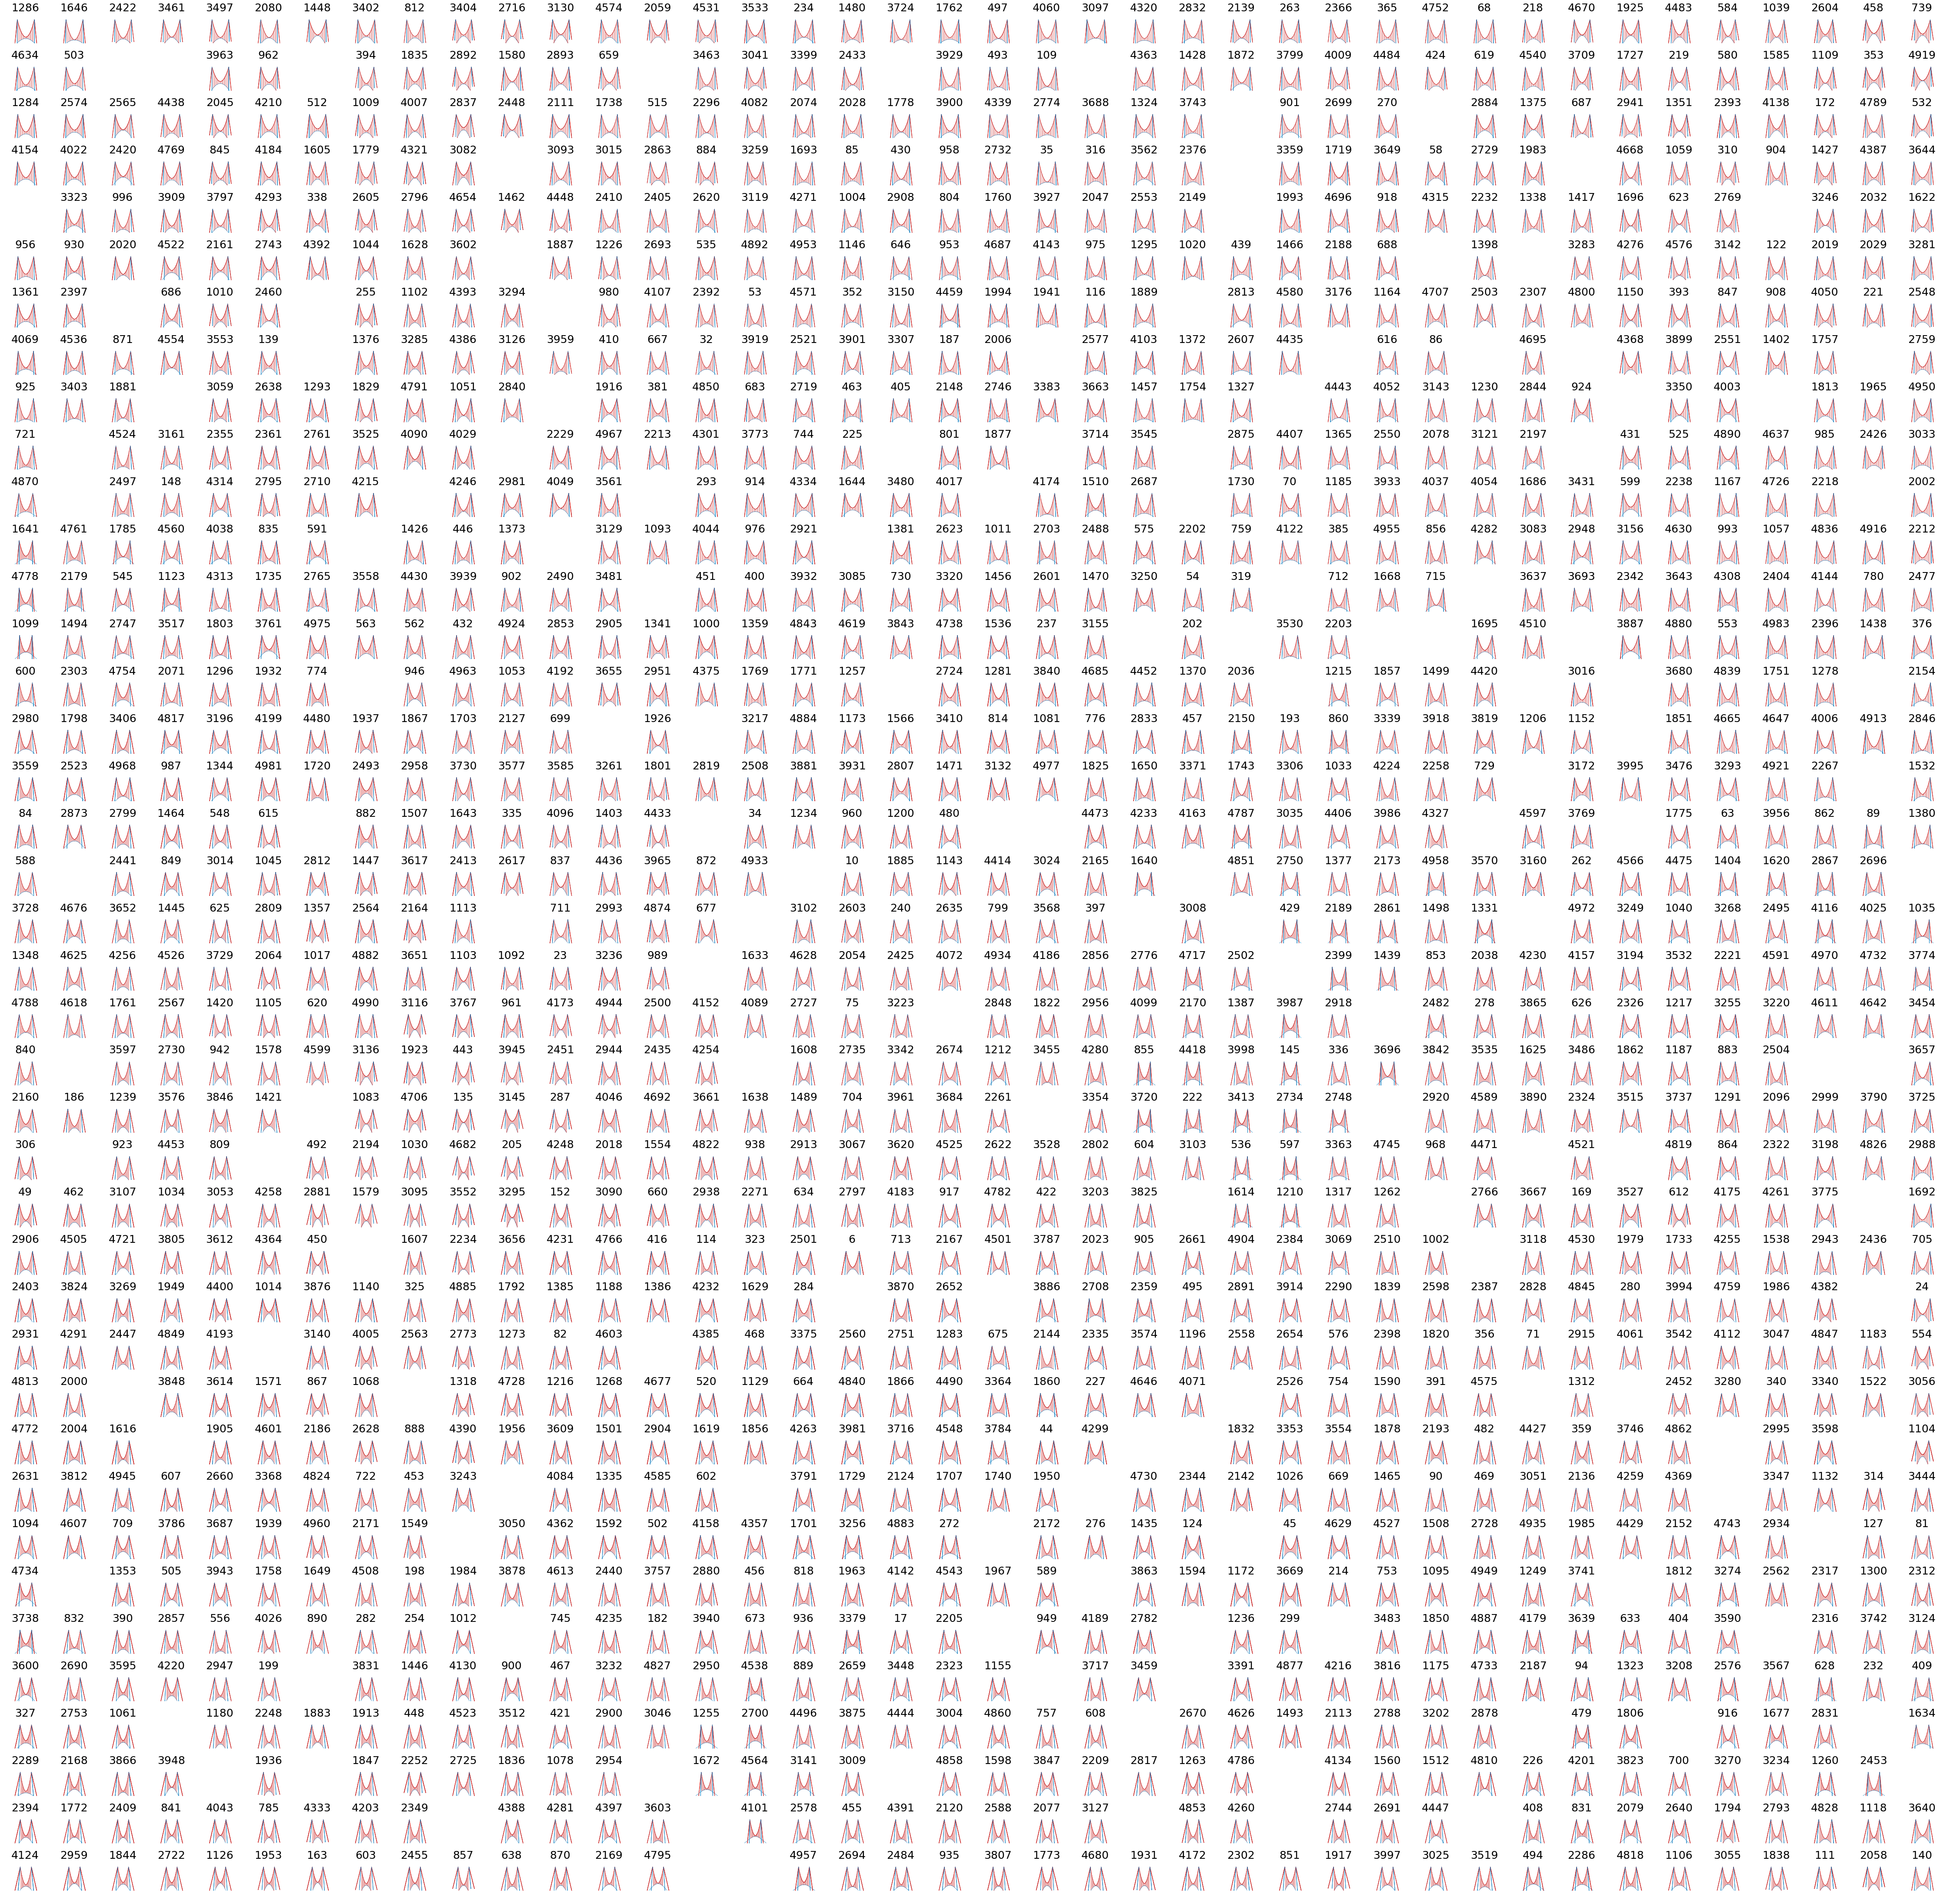

In [77]:
fig = plt.figure(figsize=(2*ncols,2*nrows))
gs = fig.add_gridspec(nrows, ncols)
gs.update(wspace=0.1, hspace=0.1)

for i in range(som.nnodes):
    row = i // ncols
    col = i % ncols
        
    f = sel_samples_SOM[i]    # representative sample f
    
    if f > -1:              
        ax = fig.add_subplot(gs[row,col], projection='3d')
        show_sample(data_filter, f, '2D-XZ', ax)
plt.show()

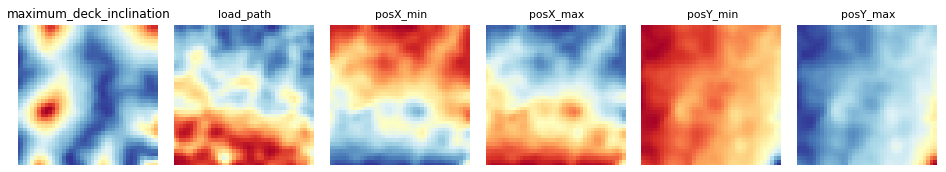

In [50]:
if features_arr.shape[1] > 100:
    pass
else:
    som.view_map(text_size=9)

In [51]:
# convert BMU index to xy position on SOM

xy_option = som.ind_to_xy(bmus[:,0])
xx = xy_option[:,1]
yy = som.mapsize[0]- xy_option[:,0]

In [54]:
def show_node(node_SOM=0, Measure1='load_path', Measure2='posX_mean'):
    
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec
    from mpl_toolkits.mplot3d import Axes3D
    
    # Print index selected SOM-node
    print ('node index: ', node_SOM)

    # Get all samples in selected SOM-node
    samples_SOM = np.argwhere(bmus==node_SOM)[:,0]
       
    # Number of samples in selected SOM-node
    K = len(samples_SOM) 
    print('number samples: ', K)
   
    if K >= 1:
        
        # Define general properties of figure
        ncols = 4    # set number of columns for visualization
        nrows = math.ceil( K / ncols)    # set number of rows for visualization

        fig = plt.figure(figsize=(10*ncols,10*nrows), constrained_layout=True)
        gs = fig.add_gridspec(nrows, ncols)
        gs.update(wspace=0.1, hspace=0.1)    # set the spacing between axes
        
        # Sort samples in SOM_node according to distance within each BMU cluster
        DF_tmp = pd.DataFrame()
        DF_tmp['sel_samples_SOM'] = samples_SOM
        DF_tmp['dists'] = dists[samples_SOM]
        DF_tmp = DF_tmp.sort_values(by=['dists'])
        ord_samples_SOM = DF_tmp['sel_samples_SOM'].copy().values[:]     # ordered samples in selected SOM-node
                         
        # Iterate through ordered samples of selected SOM-node 
        for s in range(len(ord_samples_SOM)):

            f = ord_samples_SOM[s]
            
            posXYZ_arr = posXYZ_listlist[f][:]    # nodes coordinates of sample f

            posXYZ_mat = []

            # Define array of coordinates
            for i in range(nN):
                x = posXYZ_arr[i]
                y = posXYZ_arr[nN + i]
                z = posXYZ_arr[2*nN + i] 
                posXYZ_mat.append( [x, y, z] )
            coords = np.array(posXYZ_mat)  

            # Set options for subplots
            row = s // ncols
            col = s % ncols
            ax = fig.add_subplot(gs[row,col], projection='3d')
            title_ind = data_filter.index[f]
            title_feat_1 = truncate(data_flat_filter[Measure1].iloc[f], 2)
            title_feat_2 = truncate(data_flat_filter[Measure2].iloc[f], 2)
            ax.set_title(str(title_ind) + "  " + str(title_feat_1) + "  " + str(title_feat_2), size=25)
            ax.set_aspect('auto')
            ax.axis('off')

            # Set view
            ax.set_proj_type('ortho')
            #ax.set_proj_type('persp')
            #ax.view_init(elev=90, azim=-90) # 2D-XY
            ax.view_init(elev=0, azim=90) # 2D-XZ
            #ax.view_init(elev=0, azim=0) # 2D-YZ
            #ax.view_init(elev=45, azim=45) # 3D-45
            #ax.view_init(elev=30, azim=60) # 3D-30

            # Create bounding box to simulate equal axes aspect ratio
#             bW = 40.0
#             ax.plot(0.0, 0.0, 0.0, 'w')
#             ax.plot(0.0, 0.0, bW, 'w')
#             ax.plot(0.0, bW, 0.0, 'w')
#             ax.plot(0.0, bW, bW, 'w')   
#             ax.plot(bW, 0.0, 0.0, 'w')
#             ax.plot(bW, 0.0, bW, 'w')
#             ax.plot(bW, bW, 0.0, 'w')
#             ax.plot(bW, bW, bW, 'w')  

            # Iterate through edges of sample f
            for edge_i in range(nE):

                edge = [ int(branchNode_arr[2*edge_i]), int(branchNode_arr[2*edge_i+1]) ]
                line_color = (5/256,120/256,190/256) if np.sign(edgeMag_listlist[f][edge_i]) < 0 else (200/256,20/256,20/256)
                line_width = 0.3 + np.abs(edgeMag_listlist[f][edge_i]/40)

                ax.plot(coords[edge,0], coords[edge,1], coords[edge,2], color = line_color, linewidth = line_width, antialiased=True, alpha = 1.0)
    else:
        print ('not enough data for this node')

node index:  0
number samples:  9


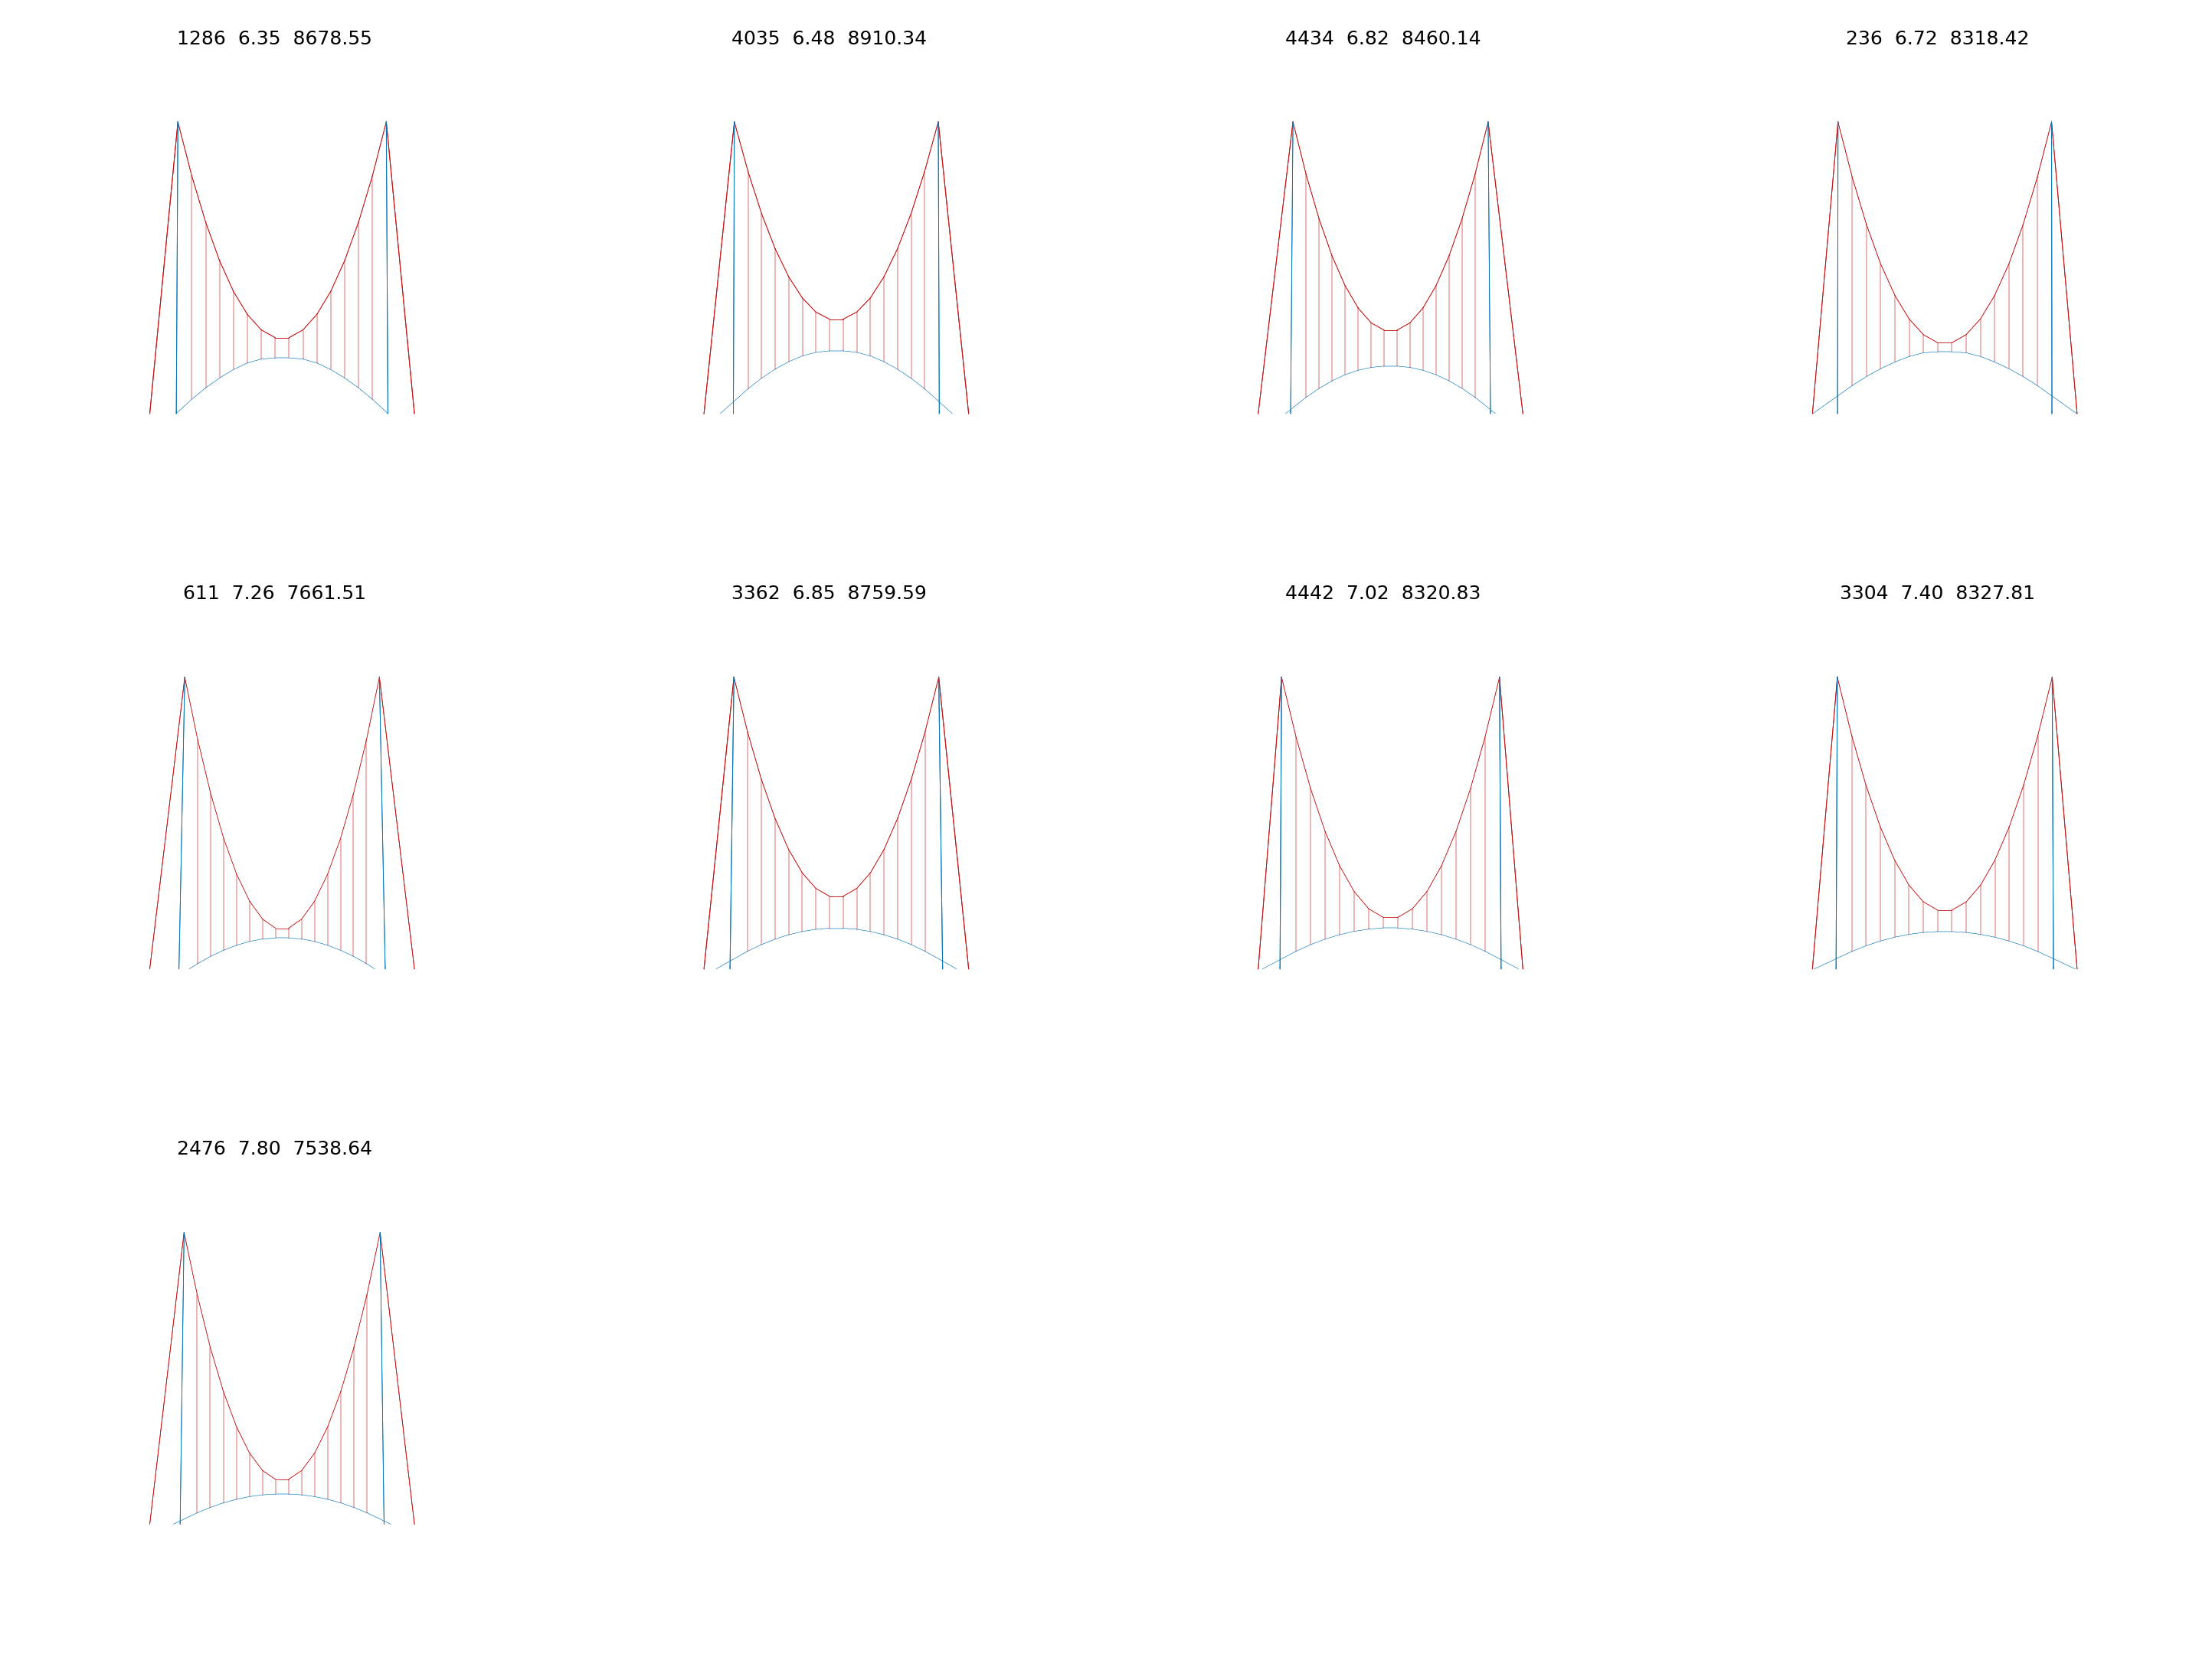

In [55]:
show_node(node_SOM = 0, Measure1='devLen_mean', Measure2='load_path')

node index:  39
number samples:  3


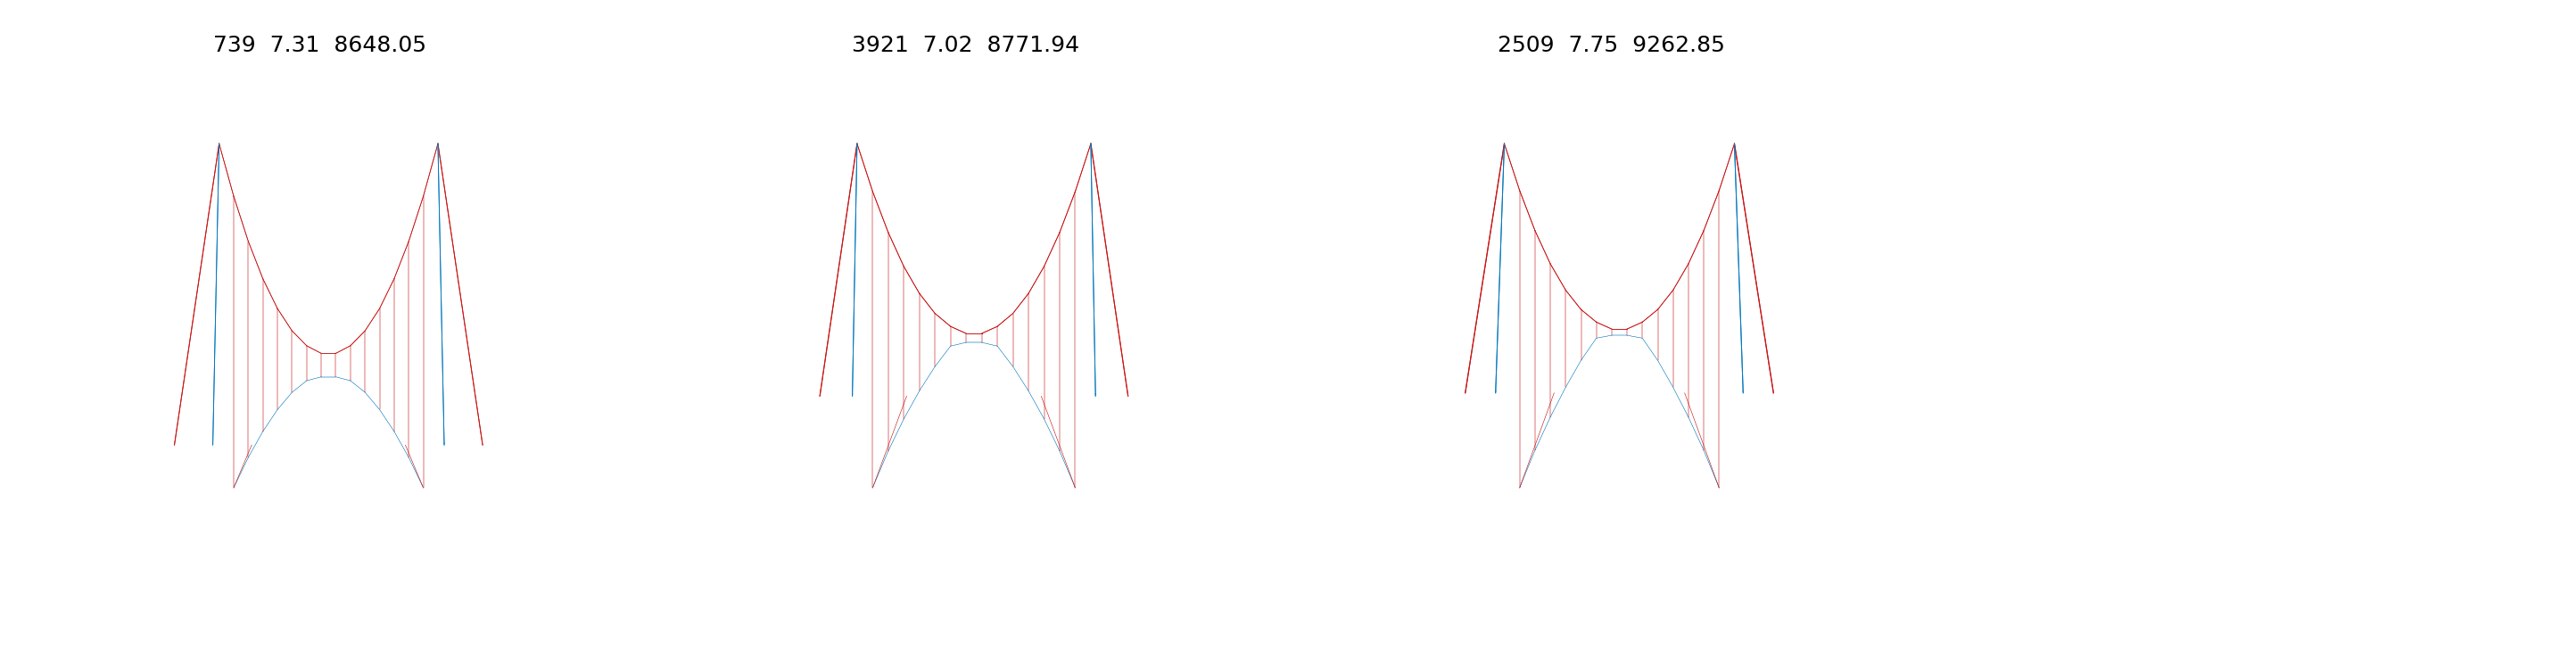

In [56]:
show_node(node_SOM=39, Measure1='devLen_mean', Measure2='load_path')

In [57]:
codebooks = SOM.denormalize_by(som.data_raw, som.codebook)
unq_bmus = np.unique(bmus)
xy_som = som.ind_to_xy(unq_bmus)


def query_nodes_new(Measure1=None, percentRange1=[0,50], Measure2=None, percentRange2=[0,50],
                    Measure3=None, percentRange3=[0,50], plot='Yes'):
    
    from IPython.display import clear_output, Image, display
  
    codebooks = SOM.denormalize_by(som.data_raw,som.codebook)

    DF_som = pd.DataFrame(data=codebooks,columns=list(som.compname[0]))
    percentiles = list(set(percentRange1).union(percentRange2).union(percentRange3))
    percentiles = list(np.sort(percentiles)/100.0)
    som_stat = DF_som.describe(percentiles=percentiles)

    ind_sel_nodes = []
    
    if Measure1 != None and  Measure2 != None and  Measure3 != None:
        ind_sel_nodes = DF_som.loc[
            (DF_som[Measure1] >= som_stat.loc[str(percentRange1[0])+'%'][Measure1])
            &
            (DF_som[Measure1] <= som_stat.loc[str(percentRange1[1])+'%'][Measure1])
            &
            (DF_som[Measure2] >= som_stat.loc[str(percentRange2[0])+'%'][Measure2])
            &
            (DF_som[Measure2] <= som_stat.loc[str(percentRange2[1])+'%'][Measure2])
            &
            (DF_som[Measure3] >= som_stat.loc[str(percentRange3[0])+'%'][Measure3])
            &
            (DF_som[Measure3] <= som_stat.loc[str(percentRange3[1])+'%'][Measure3])
        ].index.values[:]

    if Measure1 != None and Measure2 != None and Measure3 == None:
        ind_sel_nodes = DF_som.loc[
            (DF_som[Measure1] >= som_stat.loc[str(percentRange1[0])+'%'][Measure1])
            &
            (DF_som[Measure1] <= som_stat.loc[str(percentRange1[1])+'%'][Measure1])
            &
            (DF_som[Measure2] >= som_stat.loc[str(percentRange2[0])+'%'][Measure2])
            &
            (DF_som[Measure2] <= som_stat.loc[str(percentRange2[1])+'%'][Measure2])
        ].index.values[:]
    
    if Measure1 != None and  Measure2 == None and Measure3 == None:
        ind_sel_nodes = DF_som.loc[
            (DF_som[Measure1] >= som_stat.loc[str(percentRange1[0])+'%'][Measure1])
            &
            (DF_som[Measure1] <= som_stat.loc[str(percentRange1[1])+'%'][Measure1])
        ].index.values[:] 
    
    if plot=='Yes':
        xy_sel = som.ind_to_xy(ind_sel_nodes)            
        fig = plt.figure(figsize=(20,40))
        plt.rcParams.update({'font.size': 10})

        for i in range(codebooks.shape[1]):

            ax = fig.add_subplot(6,3,i+1)
            col = codebooks[unq_bmus,i]
            mn = col.min()
            mx = col.max()
            col = codebooks[ind_sel_nodes,i]
            x = xy_sel[:,1]*2
            y = som.mapsize[0]-1-xy_sel[:,0]*1
            sc = ax.scatter(x,y,s=200,c=col,cmap=plt.cm.RdYlBu_r,edgecolor='None',vmax=mx,vmin=mn,marker='o',alpha=1.);
            eps = 1
            plt.xlim(x.min()-eps,x.max()+eps)
            plt.ylim(y.min()-eps,y.max()+eps)
            plt.colorbar(sc,shrink=.5,ticks=[mn,(mn+mx)/2.0,mx])
            plt.title(som.compname[0][i])
            plt.tight_layout(pad=0.001, h_pad=0.0, w_pad=0.0)
            plt.xlim(0,som.mapsize[0]-1);
            plt.ylim(0,som.mapsize[1]-1);
            plt.xticks([]);
            plt.yticks([]);
    
    return ind_sel_nodes

In [58]:
# Design Option A

sel_options_A = query_nodes_new(Measure1='posX_min',percentRange1=[0,40], Measure2='maximum_deck_inclination',percentRange2=[0,30],
                                Measure3='load_path',percentRange3=[0,30], plot='No')
print("Selected nodes: " + str(len(sel_options_A)) + "/" + str(msz10*msz11))
print("")
print(sel_options_A)

Selected nodes: 2/1600

[825 866]


node index:  439
number samples:  7


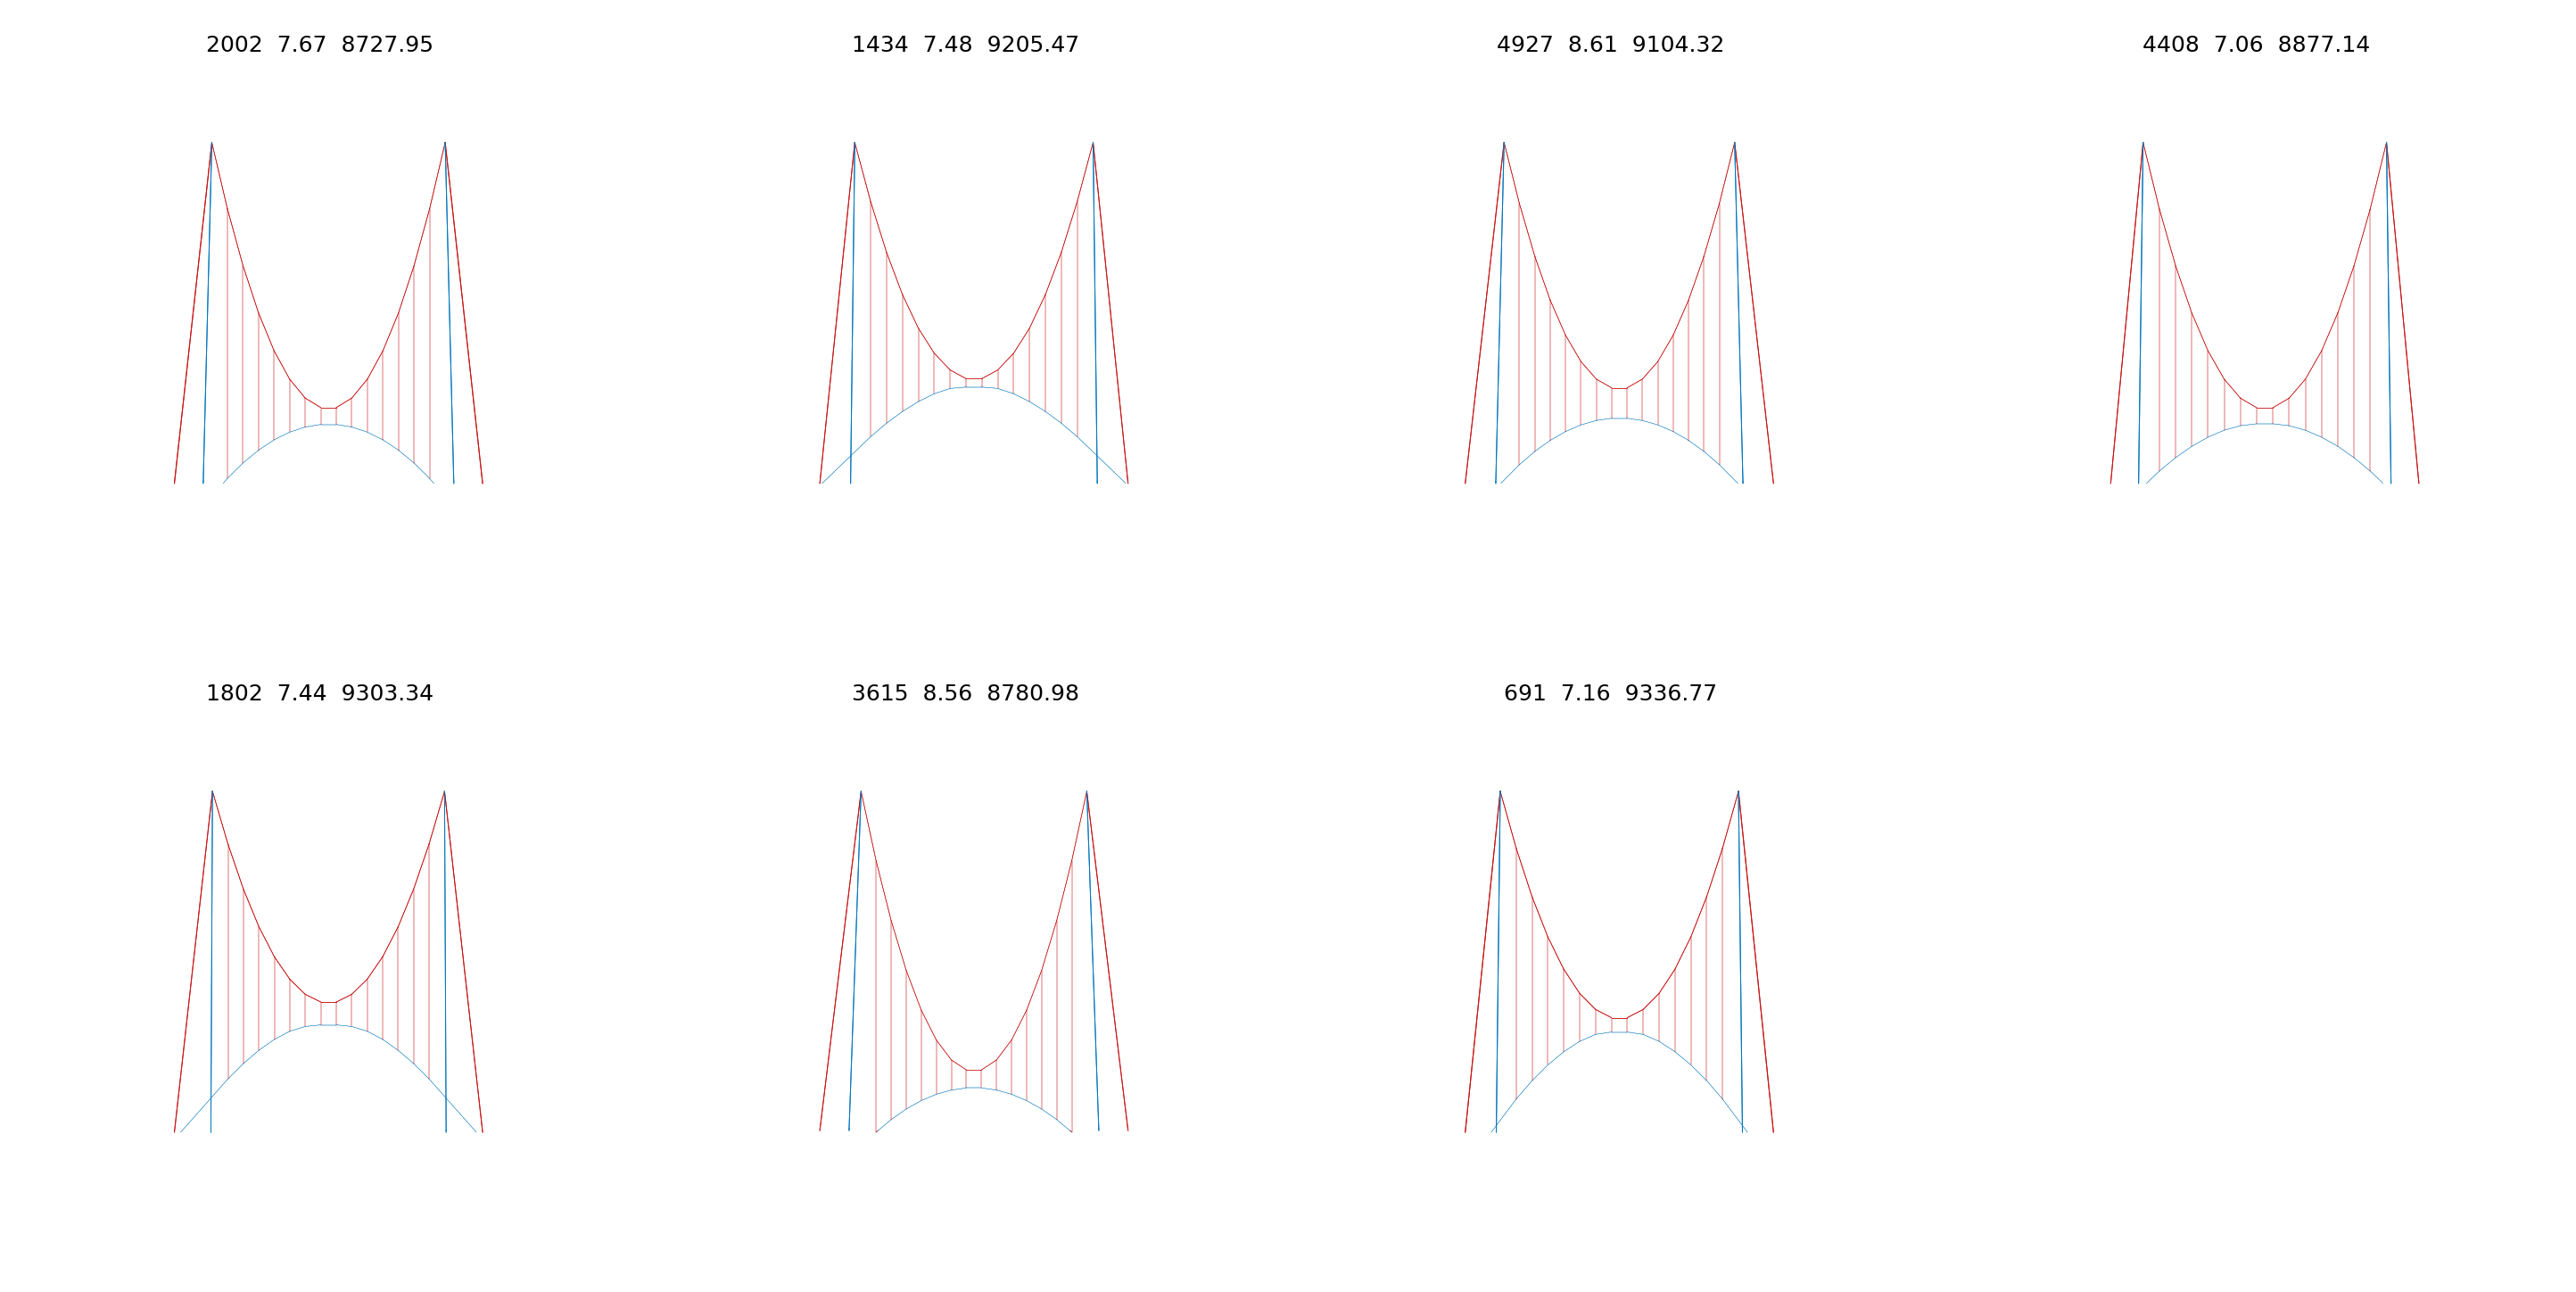

In [59]:
show_node(node_SOM=439, Measure1='devLen_mean', Measure2='load_path')